In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager as fm
from matplotlib.ticker import ScalarFormatter


Plot Calibration and Validation Results of SWATPlus (Deprecated)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


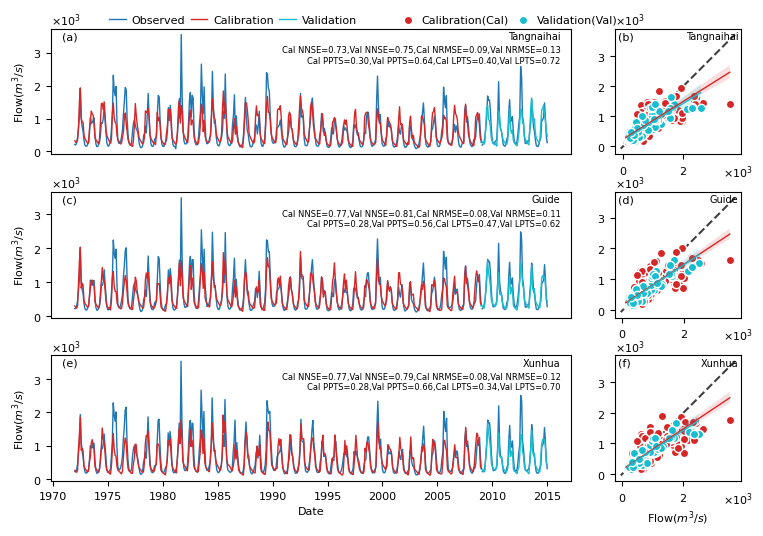

In [3]:
hydro_stations = ['Tangnaihai','Guide','Xunhua']
station_channel = {
    'Tangnaihai':3,
    'Guide':13,
    'Xunhua':9
}

plt.figure(figsize=(7.48,5.2))
ax1 = plt.subplot2grid((3,4), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,4), (0,3), colspan=1, aspect='equal')
ax3 = plt.subplot2grid((3,4), (1,0), colspan=3)
ax4 = plt.subplot2grid((3,4), (1,3), colspan=1, aspect='equal')
ax5 = plt.subplot2grid((3,4), (2,0), colspan=3)
ax6 = plt.subplot2grid((3,4), (2,3), colspan=1, aspect='equal')

metrics_results = pd.read_csv('../result/calval_metrics_result.csv',index_col='station')


ax_list = [
    [ax1,ax2,],
    [ax3,ax4,],
    [ax5,ax6,]
]
letters = [
    ['a', 'b'],
    ['c', 'd'],
    ['e', 'f']
]

# NNSEs = [
#     [0.73,0.75],
#     [0.77,0.81],
#     [0.77,0.79]
# ]

NNSEs = [
    [metrics_results.loc['Tangnaihai','CAL_NNSE_SWATPlus'],metrics_results.loc['Tangnaihai','VAL_NNSE_SWATPlus']],
    [metrics_results.loc['Guide','CAL_NNSE_SWATPlus'],metrics_results.loc['Guide','VAL_NNSE_SWATPlus']],
    [metrics_results.loc['Xunhua','CAL_NNSE_SWATPlus'],metrics_results.loc['Xunhua','VAL_NNSE_SWATPlus']]
]



# NRMSEs = [
#     [0.09,0.13],
#     [0.08,0.11],
#     [0.08,0.12]
# ]

NRMSEs = [
    [metrics_results.loc['Tangnaihai','CAL_ZNRMSE_SWATPlus'],metrics_results.loc['Tangnaihai','VAL_ZNRMSE_SWATPlus']],
    [metrics_results.loc['Guide','CAL_ZNRMSE_SWATPlus'],metrics_results.loc['Guide','VAL_ZNRMSE_SWATPlus']],
    [metrics_results.loc['Xunhua','CAL_ZNRMSE_SWATPlus'],metrics_results.loc['Xunhua','VAL_ZNRMSE_SWATPlus']]
]

# PPTSs = [
#     [0.38,0.40],
#     [0.36,0.31],
#     [0.37,0.35]
# ]

PPTSs = [
    [metrics_results.loc['Tangnaihai','CAL_PPTS_SWATPlus'],metrics_results.loc['Tangnaihai','VAL_PPTS_SWATPlus']],
    [metrics_results.loc['Guide','CAL_PPTS_SWATPlus'],metrics_results.loc['Guide','VAL_PPTS_SWATPlus']],
    [metrics_results.loc['Xunhua','CAL_PPTS_SWATPlus'],metrics_results.loc['Xunhua','VAL_PPTS_SWATPlus']]
]

# LPTSs = [
#     [1.05,0.88],
#     [0.60,0.48],
#     [0.36,0.57]
# ]

LPTSs = [
    [metrics_results.loc['Tangnaihai','CAL_LPTS_SWATPlus'],metrics_results.loc['Tangnaihai','VAL_LPTS_SWATPlus']],
    [metrics_results.loc['Guide','CAL_LPTS_SWATPlus'],metrics_results.loc['Guide','VAL_LPTS_SWATPlus']],
    [metrics_results.loc['Xunhua','CAL_LPTS_SWATPlus'],metrics_results.loc['Xunhua','VAL_LPTS_SWATPlus']]
]

font_size = 8
line_width = 1

for hydro_station,axs,letter,NNSE,NRMSE,PPTS,LPTS in zip(hydro_stations,ax_list,letters,NNSEs,NRMSEs,PPTSs,LPTSs):
    obs = pd.read_csv(
        f'../data/{hydro_station.lower()}_natural_monthly_flow.csv',
        parse_dates=['date'],
        index_col=['date']
    )
    obs_cal = obs['1972-01-01':'2008-12-31']
    obs_val = obs['2009-01-01':'2014-12-31']
    
    swatplus_calval = pd.read_csv(
        f'../result/SWATPlusCalValSimData/Channel_{station_channel[hydro_station]}_Monthly_River-Flow_{hydro_station}_Sim1972_2019.csv',
        parse_dates=['Date'],
        index_col=['Date']
    )
    swatplus_cal = swatplus_calval['1972-01-01':'2008-12-31']
    swatplus_val = swatplus_calval['2009-01-01':'2014-12-31']

    df_cal = pd.DataFrame(index=obs_cal.index)
    df_cal['obs'] = obs_cal['flow(m^3/s)'].values
    df_cal['swatplus'] = swatplus_cal['Value'].values
    df_val = pd.DataFrame(index=obs_val.index)
    df_val['obs'] = obs_val['flow(m^3/s)'].values
    df_val['swatplus'] = swatplus_val['Value'].values

    sns.lineplot(data=df_cal,x=df_cal.index,y='obs',ax=axs[0],color='tab:blue',linewidth=line_width)
    sns.lineplot(data=df_val,x=df_val.index,y='obs',ax=axs[0],label='Observed',color='tab:blue',linewidth=line_width)

    sns.lineplot(data=df_cal,x=df_cal.index,y='swatplus',ax=axs[0],label='Calibration',color='tab:red',linewidth=line_width)
    sns.lineplot(data=df_val,x=df_val.index,y='swatplus',ax=axs[0],label='Validation',color='tab:cyan',linewidth=line_width)
    
    sns.scatterplot(data=df_cal,x='obs',y='swatplus',ax=axs[1],color='tab:red',linewidth=line_width,label='Calibration(Cal)')
    sns.scatterplot(data=df_val,x='obs',y='swatplus',ax=axs[1],color='tab:cyan',linewidth=line_width,label='Validation(Val)')
    
    # 添加45度斜线
    lims = [
        np.min([axs[1].get_xlim(), axs[1].get_ylim()]),  # 获取x和y轴的最小值
        np.max([axs[1].get_xlim(), axs[1].get_ylim()]),  # 获取x和y轴的最大值
    ]
    axs[1].plot(lims, lims, 'k--', alpha=0.75, zorder=0)
    
    # 添加实测预测散点图线型插值线，分别为校准期和验证期
    sns.regplot(data=df_cal, x='obs', y='swatplus', ax=axs[1], scatter=False, color='tab:red', line_kws={'linewidth': 1}, )
    sns.regplot(data=df_val, x='obs', y='swatplus', ax=axs[1], scatter=False, color='tab:cyan', line_kws={'linewidth': 1}, )

    axs[0].set_xlabel('Date', fontsize=font_size)
    axs[0].set_ylabel('Flow($m^3/s$)', fontsize=font_size)
    
    # 根据测站情况设置axs[1]的标签
    if hydro_station in ['Tangnaihai', 'Guide']:
        axs[1].set_xlabel('')
    else:
        axs[1].set_xlabel('Flow($m^3/s$)', fontsize=font_size)
    axs[1].set_ylabel('')  # 所有测站的axs[1]都不显示纵轴标签

    if hydro_station == 'Tangnaihai':
        axs[0].legend(loc='upper center', bbox_to_anchor=(0.35, 1.2), ncol=4, fontsize=font_size,frameon=False,
                      columnspacing=0.5,
           handlelength=1.5,
           handletextpad=0.5,
           borderaxespad=0.5,
           borderpad=0.5,
           labelspacing=0.5,)
        axs[1].legend(loc='upper center', bbox_to_anchor=(-0.85, 1.2), ncol=4, fontsize=font_size,frameon=False,
                      columnspacing=0.5,
           handlelength=1.5,
           handletextpad=0.5,
           borderaxespad=0.5,
           borderpad=0.5,
           labelspacing=0.5,)
    else:
        axs[0].get_legend().remove()
        axs[1].get_legend().remove()
        
    # 在每个子图中添加测站名称和编号
    
    for i, ax in enumerate(axs):
        ax.text(0.02, 0.98, f'({letter[i]})', transform=ax.transAxes, fontsize=font_size, va='top', ha='left')
        ax.text(0.98, 0.98, hydro_station, transform=ax.transAxes, fontsize=font_size-1, va='top', ha='right')
        if i == 0:
            ax.text(0.98, 0.95, 
                    f'\nCal NNSE={NNSE[0]:.2f},Val NNSE={NNSE[1]:.2f},Cal NRMSE={NRMSE[0]:.2f},Val NRMSE={NRMSE[1]:.2f}\n'+
                    f'Cal PPTS={PPTS[0]:.2f},Val PPTS={PPTS[1]:.2f},Cal LPTS={LPTS[0]:.2f},Val LPTS={LPTS[1]:.2f}', 
                    transform=ax.transAxes, fontsize=font_size-2, va='top', ha='right')

    if hydro_station in ['Tangnaihai', 'Guide']:
        axs[0].xaxis.set_ticklabels([])
        axs[0].xaxis.set_ticks([])
        axs[0].set_xlabel('')

    # 设置axs[0]的纵轴使用科学计数法
    axs[0].yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    axs[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axs[0].yaxis.offsetText.set_fontsize(font_size)
    axs[0].tick_params(axis='both', which='major', labelsize=font_size)

    # 设置axs[1]的横轴和纵轴都使用科学计数法，并将标识紧贴轴末端边缘
    axs[1].yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    axs[1].xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    axs[1].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    axs[1].yaxis.offsetText.set_fontsize(font_size)
    axs[1].xaxis.offsetText.set_fontsize(font_size)
    axs[1].tick_params(axis='both', which='major', labelsize=font_size)
    
    # 尝试使用其他方法调整科学计数法标识的位置
    axs[1].yaxis.offsetText.set_position((0.0, 1))
    axs[1].xaxis.offsetText.set_position((1.1, 1.5))
    axs[1].xaxis.offsetText.set_va('bottom')  # 设置垂直对齐方式为底部
    axs[1].xaxis.offsetText.set_ha('right')   # 设置水平对齐方式为右侧
    
    
    
    # 调整子图之间的间距和边距
plt.subplots_adjust(left=0.05, right=0.99, top=0.95, bottom=0.08, wspace=0.2, hspace=0.3)
plt.savefig(f'../figs/SWATPlusCalVal.png',format='png',dpi=300)
plt.savefig(f'../figs/SWATPlusCalVal.eps',format='eps',dpi=1000)
plt.savefig(f'../figs/SWATPlusCalVal.tif', format='TIFF', dpi=330)


Plot Calibration and Validation Results of SWATPlus

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


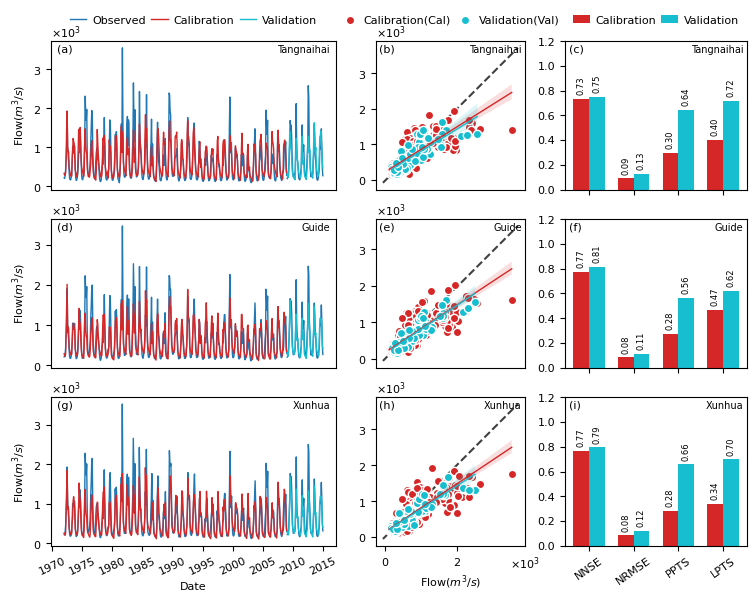

In [4]:
hydro_stations = ['Tangnaihai','Guide','Xunhua']
station_channel = {
    'Tangnaihai':3,
    'Guide':13,
    'Xunhua':9
}

plt.figure(figsize=(7.48,5.8))
ax1 = plt.subplot2grid((3,7), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,7), (0,3), colspan=2, aspect='equal')
ax3 = plt.subplot2grid((3,7), (0,5), colspan=2)
ax4 = plt.subplot2grid((3,7), (1,0), colspan=3)
ax5 = plt.subplot2grid((3,7), (1,3), colspan=2, aspect='equal')
ax6 = plt.subplot2grid((3,7), (1,5), colspan=2)
ax7 = plt.subplot2grid((3,7), (2,0), colspan=3)
ax8 = plt.subplot2grid((3,7), (2,3), colspan=2, aspect='equal')
ax9 = plt.subplot2grid((3,7), (2,5), colspan=2)



ax_list = [
    [ax1,ax2,ax3],
    [ax4,ax5,ax6],
    [ax7,ax8,ax9]
]
letters = [
    ['a', 'b', 'c'],
    ['d', 'e', 'f'],
    ['g', 'h', 'i']
]

# NNSEs = [
#     [0.73,0.75],
#     [0.77,0.81],
#     [0.77,0.79]
# ]

NNSEs = [
    [metrics_results.loc['Tangnaihai','CAL_NNSE_SWATPlus'],metrics_results.loc['Tangnaihai','VAL_NNSE_SWATPlus']],
    [metrics_results.loc['Guide','CAL_NNSE_SWATPlus'],metrics_results.loc['Guide','VAL_NNSE_SWATPlus']],
    [metrics_results.loc['Xunhua','CAL_NNSE_SWATPlus'],metrics_results.loc['Xunhua','VAL_NNSE_SWATPlus']]
]



# NRMSEs = [
#     [0.09,0.13],
#     [0.08,0.11],
#     [0.08,0.12]
# ]

NRMSEs = [
    [metrics_results.loc['Tangnaihai','CAL_ZNRMSE_SWATPlus'],metrics_results.loc['Tangnaihai','VAL_ZNRMSE_SWATPlus']],
    [metrics_results.loc['Guide','CAL_ZNRMSE_SWATPlus'],metrics_results.loc['Guide','VAL_ZNRMSE_SWATPlus']],
    [metrics_results.loc['Xunhua','CAL_ZNRMSE_SWATPlus'],metrics_results.loc['Xunhua','VAL_ZNRMSE_SWATPlus']]
]

# PPTSs = [
#     [0.38,0.40],
#     [0.36,0.31],
#     [0.37,0.35]
# ]

PPTSs = [
    [metrics_results.loc['Tangnaihai','CAL_PPTS_SWATPlus'],metrics_results.loc['Tangnaihai','VAL_PPTS_SWATPlus']],
    [metrics_results.loc['Guide','CAL_PPTS_SWATPlus'],metrics_results.loc['Guide','VAL_PPTS_SWATPlus']],
    [metrics_results.loc['Xunhua','CAL_PPTS_SWATPlus'],metrics_results.loc['Xunhua','VAL_PPTS_SWATPlus']]
]

# LPTSs = [
#     [1.05,0.88],
#     [0.60,0.48],
#     [0.36,0.57]
# ]

LPTSs = [
    [metrics_results.loc['Tangnaihai','CAL_LPTS_SWATPlus'],metrics_results.loc['Tangnaihai','VAL_LPTS_SWATPlus']],
    [metrics_results.loc['Guide','CAL_LPTS_SWATPlus'],metrics_results.loc['Guide','VAL_LPTS_SWATPlus']],
    [metrics_results.loc['Xunhua','CAL_LPTS_SWATPlus'],metrics_results.loc['Xunhua','VAL_LPTS_SWATPlus']]
]

font_size = 8
line_width = 1

for hydro_station,axs,letter,NNSE,NRMSE,PPTS,LPTS in zip(hydro_stations,ax_list,letters,NNSEs,NRMSEs,PPTSs,LPTSs):
    obs = pd.read_csv(
        f'../data/{hydro_station.lower()}_natural_monthly_flow.csv',
        parse_dates=['date'],
        index_col=['date']
    )
    obs_cal = obs['1972-01-01':'2008-12-31']
    obs_val = obs['2009-01-01':'2014-12-31']
    
    swatplus_calval = pd.read_csv(
        f'../result/SWATPlusCalValSimData/Channel_{station_channel[hydro_station]}_Monthly_River-Flow_{hydro_station}_Sim1972_2019.csv',
        parse_dates=['Date'],
        index_col=['Date']
    )
    swatplus_cal = swatplus_calval['1972-01-01':'2008-12-31']
    swatplus_val = swatplus_calval['2009-01-01':'2014-12-31']

    df_cal = pd.DataFrame(index=obs_cal.index)
    df_cal['obs'] = obs_cal['flow(m^3/s)'].values
    df_cal['swatplus'] = swatplus_cal['Value'].values
    df_val = pd.DataFrame(index=obs_val.index)
    df_val['obs'] = obs_val['flow(m^3/s)'].values
    df_val['swatplus'] = swatplus_val['Value'].values

    sns.lineplot(data=df_cal,x=df_cal.index,y='obs',ax=axs[0],color='tab:blue',linewidth=line_width)
    sns.lineplot(data=df_val,x=df_val.index,y='obs',ax=axs[0],label='Observed',color='tab:blue',linewidth=line_width)

    sns.lineplot(data=df_cal,x=df_cal.index,y='swatplus',ax=axs[0],label='Calibration',color='tab:red',linewidth=line_width)
    sns.lineplot(data=df_val,x=df_val.index,y='swatplus',ax=axs[0],label='Validation',color='tab:cyan',linewidth=line_width)
    
    sns.scatterplot(data=df_cal,x='obs',y='swatplus',ax=axs[1],color='tab:red',linewidth=line_width,label='Calibration(Cal)')
    sns.scatterplot(data=df_val,x='obs',y='swatplus',ax=axs[1],color='tab:cyan',linewidth=line_width,label='Validation(Val)')
    
    # 添加45度斜线
    lims = [
        np.min([axs[1].get_xlim(), axs[1].get_ylim()]),  # 获取x和y轴的最小值
        np.max([axs[1].get_xlim(), axs[1].get_ylim()]),  # 获取x和y轴的最大值
    ]
    axs[1].plot(lims, lims, 'k--', alpha=0.75, zorder=0)
    
    # 添加实测预测散点图线型插值线，分别为校准期和验证期
    sns.regplot(data=df_cal, x='obs', y='swatplus', ax=axs[1], scatter=False, color='tab:red', line_kws={'linewidth': 1}, )
    sns.regplot(data=df_val, x='obs', y='swatplus', ax=axs[1], scatter=False, color='tab:cyan', line_kws={'linewidth': 1}, )

    # 在axs[2]中绘制评价指标的柱状图
    metrics = ['NNSE', 'NRMSE', 'PPTS', 'LPTS']
    cal_values = [NNSE[0], NRMSE[0], PPTS[0], LPTS[0]]
    val_values = [NNSE[1], NRMSE[1], PPTS[1], LPTS[1]]
    
    x = np.arange(len(metrics))
    width = 0.35
    
    rects1 = axs[2].bar(x - width/2, cal_values, width, label='Calibration', color='tab:red')
    rects2 = axs[2].bar(x + width/2, val_values, width, label='Validation', color='tab:cyan')
    
    # 在柱子上添加数值标签
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            axs[2].annotate(f'{height:.2f}',
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', rotation=90, fontsize=font_size-2)

    autolabel(rects1)
    autolabel(rects2)
    
    # axs[2].set_ylabel('Value', fontsize=font_size)
    axs[2].set_xticks(x)
    axs[2].set_xticklabels(metrics, fontsize=font_size-1, rotation=25)
    axs[2].tick_params(axis='y', labelsize=font_size)
    axs[2].set_ylim(0, 1.2)
    
    axs[0].set_xlabel('Date', fontsize=font_size)
    axs[0].set_ylabel('Flow($m^3/s$)', fontsize=font_size)
    axs[0].tick_params(axis='x', rotation=25)  # 设置ax[0]的横轴标签rotation为25°
    
    # 根据测站情况设置axs[1]的标签
    if hydro_station in ['Tangnaihai', 'Guide']:
        axs[1].set_xlabel('')
    else:
        axs[1].set_xlabel('Flow($m^3/s$)', fontsize=font_size)
    axs[1].set_ylabel('')  # 所有测站的axs[1]都不显示纵轴标签

    if hydro_station == 'Tangnaihai':
        axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=4, fontsize=font_size,frameon=False,
                      columnspacing=0.5,
           handlelength=1.5,
           handletextpad=0.5,
           borderaxespad=0.5,
           borderpad=0.5,
           labelspacing=0.5,)
        axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=4, fontsize=font_size,frameon=False,
                      columnspacing=0.5,
           handlelength=1.5,
           handletextpad=0.5,
           borderaxespad=0.5,
           borderpad=0.5,
           labelspacing=0.5,)
        axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2, fontsize=font_size, frameon=False,
                      columnspacing=0.5,
                      handlelength=1.5,
                      handletextpad=0.5,
                      borderaxespad=0.5,
                      borderpad=0.5,
                      labelspacing=0.5)
    else:
        axs[0].get_legend().remove()
        axs[1].get_legend().remove()
        # axs[2].get_legend().remove()
        
    
        
    # 在每个子图中添加测站名称和编号
    
    for i, ax in enumerate(axs):
        ax.text(0.02, 0.98, f'({letter[i]})', transform=ax.transAxes, fontsize=font_size, va='top', ha='left')
        ax.text(0.98, 0.98, hydro_station, transform=ax.transAxes, fontsize=font_size-1, va='top', ha='right')

    

    # 设置axs[0]的纵轴使用科学计数法
    axs[0].yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    axs[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axs[0].yaxis.offsetText.set_fontsize(font_size)
    axs[0].tick_params(axis='both', which='major', labelsize=font_size)

    # 设置axs[1]的横轴和纵轴都使用科学计数法，并将标识紧贴轴末端边缘
    axs[1].yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    axs[1].xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    axs[1].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    axs[1].yaxis.offsetText.set_fontsize(font_size)
    axs[1].xaxis.offsetText.set_fontsize(font_size)
    axs[1].tick_params(axis='both', which='major', labelsize=font_size)
    
    # 尝试使用其他方法调整科学计数法标识的位置
    axs[1].yaxis.offsetText.set_position((0.0, 1))
    axs[1].xaxis.offsetText.set_position((1.1, 1.5))
    axs[1].xaxis.offsetText.set_va('bottom')  # 设置垂直对齐方式为底部
    axs[1].xaxis.offsetText.set_ha('right')   # 设置水平对齐方式为右侧

    if hydro_station in ['Tangnaihai', 'Guide']:
        axs[0].xaxis.set_ticklabels([])
        axs[0].xaxis.set_ticks([])
        axs[0].set_xlabel('')

     # 根据测站情况设置axs[1]的标签
    if hydro_station in ['Tangnaihai', 'Guide']:
        axs[1].set_xlabel('')
        axs[1].xaxis.set_ticks([])
        axs[1].set_xticklabels([])  # 不显示xticklabel
    else:
        axs[1].set_xlabel('Flow($m^3/s$)', fontsize=font_size)

    if hydro_station not in ['Tangnaihai', 'Guide']:
        axs[2].set_xticklabels(metrics, fontsize=font_size, rotation=35)
    else:
        axs[2].set_xticklabels([])
    
    
    
    # 调整子图之间的间距和边距
plt.subplots_adjust(left=0.05, right=0.98, top=0.95, bottom=0.08, wspace=0.3, hspace=0.2)
plt.savefig(f'../figs/SWATPlusCalVal.png',format='png',dpi=300)
plt.savefig(f'../figs/SWATPlusCalVal.eps',format='eps',dpi=1000)
plt.savefig(f'../figs/SWATPlusCalVal.tif', format='TIFF', dpi=330)


Plot Calibration and Validation Results of SARIMA


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


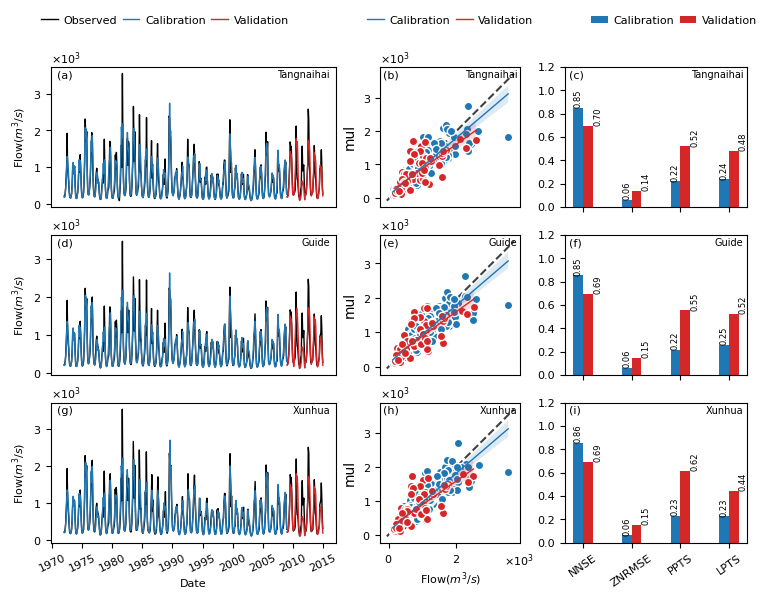

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from metrics import NNSE, ZNRMSE, PPTS, LPTS

hydro_stations = ['Tangnaihai', 'Guide', 'Xunhua']
val_years = np.arange(2009, 2015, 1)

plt.figure(figsize=(7.48,5.8))
ax1 = plt.subplot2grid((3,7), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,7), (0,3), colspan=2, aspect='equal')
ax3 = plt.subplot2grid((3,7), (0,5), colspan=2)
ax4 = plt.subplot2grid((3,7), (1,0), colspan=3)
ax5 = plt.subplot2grid((3,7), (1,3), colspan=2, aspect='equal')
ax6 = plt.subplot2grid((3,7), (1,5), colspan=2)
ax7 = plt.subplot2grid((3,7), (2,0), colspan=3)
ax8 = plt.subplot2grid((3,7), (2,3), colspan=2, aspect='equal')
ax9 = plt.subplot2grid((3,7), (2,5), colspan=2)

ax_list = [
    [ax1,ax2,ax3],
    [ax4,ax5,ax6],
    [ax7,ax8,ax9]
]
letters = [
    ['a', 'b', 'c'],
    ['d', 'e', 'f'],
    ['g', 'h', 'i']
]

metrics_results = pd.read_csv('../result/calval_metrics_result.csv',index_col=['station'])

NNSE_dict={}
NRMSE_dict={}
PPTS_dict={}
LPTS_dict={}

for station in hydro_stations:
    NNSE_dict[station] = {}
    NRMSE_dict[station] = {}
    PPTS_dict[station] = {}
    LPTS_dict[station] = {}
    for mode in ['Additive', 'Multiplicative']:
        for period in ['CAL', 'VAL']:
            NNSE_dict[station][f'{mode}_{period}'] = metrics_results.loc[station,f'{period}_NNSE_ARIMA_{mode}']
            NRMSE_dict[station][f'{mode}_{period}'] = metrics_results.loc[station,f'{period}_ZNRMSE_ARIMA_{mode}']
            PPTS_dict[station][f'{mode}_{period}'] = metrics_results.loc[station,f'{period}_PPTS_ARIMA_{mode}']
            LPTS_dict[station][f'{mode}_{period}'] = metrics_results.loc[station,f'{period}_LPTS_ARIMA_{mode}']

line_width = 1
font_size = 8

for hydro_station,axs,letter in zip(hydro_stations,ax_list,letters):
    # 读取数据
    obs = pd.read_csv(f'../data/{hydro_station.lower()}_natural_monthly_flow.csv', 
                      index_col=['date'], parse_dates=['date'])
    
    obs_cal = obs['1972-01-01':'2008-12-31']
    obs_val = obs['2009-01-01':'2014-12-31']

    mul_cal = pd.read_csv(f'../result/ARIMAPredData/seasonal_decompose_multiplicative_arima_train_sim_{hydro_station}_before_2009.csv',
                          parse_dates=['date'], index_col=['date'])
    
    mul_cal = mul_cal['1972-01-01':'2008-12-31']

    add_cal = pd.read_csv(f'../result/ARIMAPredData/seasonal_decompose_additive_arima_train_sim_{hydro_station}_before_2009.csv',
                          parse_dates=['date'], index_col=['date'])
    add_cal = add_cal['1972-01-01':'2008-12-31']
    
    mul_val = pd.read_csv(f'../result/ARIMAPredData/seasonal_decompose_multiplicative_arima_pred_{hydro_station.lower()}_2009_2014.csv',
                          parse_dates=['date'], index_col=['date'])
    mul_val = mul_val['2009-01-01':'2014-12-31']
    
    add_val = pd.read_csv(f'../result/ARIMAPredData/seasonal_decompose_additive_arima_pred_{hydro_station.lower()}_2009_2014.csv',
                          parse_dates=['date'], index_col=['date'])
    add_val = add_val['2009-01-01':'2014-12-31']

    cal_df = pd.DataFrame(index=obs_cal.index)
    cal_df['obs'] = obs_cal['flow(m^3/s)'].values
    cal_df['mul'] = mul_cal['SimFlow(m^3/s)'].values
    cal_df['add'] = add_cal['SimFlow(m^3/s)'].values

    val_df = pd.DataFrame(index=obs_val.index)
    val_df['obs'] = obs_val['flow(m^3/s)'].values
    val_df['mul'] = mul_val['flow(m^3/s)'].values
    val_df['add'] = add_val['flow(m^3/s)'].values

    sns.lineplot(data=cal_df,x=cal_df.index,y='obs',ax=axs[0],color='black',linewidth=line_width)
    sns.lineplot(data=val_df,x=val_df.index,y='obs',ax=axs[0],color='black',linewidth=line_width,label='Observed')
    sns.lineplot(data=cal_df,x=mul_cal.index,y='mul',ax=axs[0],color='tab:blue',linewidth=line_width,label='Calibration')
    # sns.lineplot(data=cal_df,x=add_cal.index,y='add',ax=axs[0],color='tab:cyan',linewidth=line_width,label='Add Cal')
    sns.lineplot(data=val_df,x=mul_val.index,y='mul',ax=axs[0],color='tab:red',linewidth=line_width,label='Validation')
    # sns.lineplot(data=val_df,x=add_val.index,y='add',ax=axs[0],color='tab:olive',linewidth=line_width,label='Add Val')

    sns.scatterplot(data=cal_df,x='obs',y='mul',ax=axs[1],color='tab:blue',linewidth=line_width)
    # sns.scatterplot(data=cal_df,x='obs',y='add',ax=axs[1],color='tab:cyan',linewidth=line_width,label='Add Cal')
    sns.scatterplot(data=val_df,x='obs',y='mul',ax=axs[1],color='tab:red',linewidth=line_width)
    # sns.scatterplot(data=val_df,x='obs',y='add',ax=axs[1],color='tab:olive',linewidth=line_width,label='Add Val')

    # 添加45度斜线
    lims = [
        np.min([axs[1].get_xlim(), axs[1].get_ylim()]),  # 获取x和y轴的最小值
        np.max([axs[1].get_xlim(), axs[1].get_ylim()]),  # 获取x和y轴的最大值
    ]
    axs[1].plot(lims, lims, 'k--', alpha=0.75, zorder=0)

    # 添加实测预测散点图线型插值线，分别为校准期和验证期
    sns.regplot(data=cal_df, x='obs', y='mul', ax=axs[1], scatter=False, color='tab:blue', line_kws={'linewidth': 1}, label='Calibration')
    # sns.regplot(data=cal_df, x='obs', y='add', ax=axs[1], scatter=False, color='tab:cyan', line_kws={'linewidth': 1}, label='Add Cal')
    sns.regplot(data=val_df, x='obs', y='mul', ax=axs[1], scatter=False, color='tab:red', line_kws={'linewidth': 1}, label='Validation')
    # sns.regplot(data=val_df, x='obs', y='add', ax=axs[1], scatter=False, color='tab:olive', line_kws={'linewidth': 1}, label='Add Val')
    
    # 在axs[2]中绘制评价指标柱状图
    metrics = ['NNSE', 'ZNRMSE', 'PPTS', 'LPTS']
    x = np.arange(len(metrics))
    width = 0.2
    
    # add_cal_values = [NNSE_dict[hydro_station]['Additive_CAL'], NRMSE_dict[hydro_station]['Additive_CAL'], 
    #                   PPTS_dict[hydro_station]['Additive_CAL'], LPTS_dict[hydro_station]['Additive_CAL']]
    mul_cal_values = [NNSE_dict[hydro_station]['Multiplicative_CAL'], NRMSE_dict[hydro_station]['Multiplicative_CAL'], 
                      PPTS_dict[hydro_station]['Multiplicative_CAL'], LPTS_dict[hydro_station]['Multiplicative_CAL']]
    # add_val_values = [NNSE_dict[hydro_station]['Additive_VAL'], NRMSE_dict[hydro_station]['Additive_VAL'], 
    #                   PPTS_dict[hydro_station]['Additive_VAL'], LPTS_dict[hydro_station]['Additive_VAL']]
    mul_val_values = [NNSE_dict[hydro_station]['Multiplicative_VAL'], NRMSE_dict[hydro_station]['Multiplicative_VAL'], 
                      PPTS_dict[hydro_station]['Multiplicative_VAL'], LPTS_dict[hydro_station]['Multiplicative_VAL']]
    
    # axs[2].bar(x - 1.5*width, add_cal_values, width, label='Add Cal', color='tab:cyan')
    axs[2].bar(x - 0.5*width, mul_cal_values, width, label='Calibration', color='tab:blue')
    # axs[2].bar(x + 0.5*width, add_val_values, width, label='Add Val', color='tab:olive')
    axs[2].bar(x + 0.5*width, mul_val_values, width, label='Validation', color='tab:red')

    # 添加竖向的数值标签
    # for i, v in enumerate(add_cal_values):
    #     axs[2].text(x[i] - 1.5*width, v, f'{v:.2f}', ha='center', va='bottom', rotation=90, fontsize=font_size-2)
    for i, v in enumerate(mul_cal_values):
        axs[2].text(x[i] - 0.5*width, v, f'{v:.2f}', ha='center', va='bottom', rotation=90, fontsize=font_size-2)
    # for i, v in enumerate(add_val_values):
    #     axs[2].text(x[i] + 0.5*width, v, f'{v:.2f}', ha='center', va='bottom', rotation=90, fontsize=font_size-2)
    for i, v in enumerate(mul_val_values):
        axs[2].text(x[i] + 1.5*width, v, f'{v:.2f}', ha='center', va='bottom', rotation=90, fontsize=font_size-2)

    axs[2].set_xticks(x)
    axs[2].set_xticklabels(metrics)
    axs[2].legend(fontsize=font_size-2)
    axs[2].tick_params(axis='both', which='major', labelsize=font_size-2)

    axs[2].set_xticks(x)
    axs[2].set_xticklabels(metrics, fontsize=font_size-1, rotation=25)
    axs[2].tick_params(axis='y', labelsize=font_size)
    axs[2].set_ylim(0, 1.2)
    
    axs[0].set_xlabel('Date', fontsize=font_size)
    axs[0].set_ylabel('Flow($m^3/s$)', fontsize=font_size)
    axs[0].tick_params(axis='x', rotation=25)  # 设置ax[0]的横轴标签rotation为25°
    
    

    if hydro_station == 'Tangnaihai':
        axs[0].legend(loc='upper center', bbox_to_anchor=(0.4, 1.45), ncol=3, fontsize=font_size,frameon=False,
                      columnspacing=0.5,
           handlelength=1.5,
           handletextpad=0.5,
           borderaxespad=0.5,
           borderpad=0.5,
           labelspacing=0.5,)
        axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.45), ncol=4, fontsize=font_size,frameon=False,
                      columnspacing=0.5,
           handlelength=1.5,
           handletextpad=0.5,
           borderaxespad=0.5,
           borderpad=0.5,
           labelspacing=0.5,)
        axs[2].legend(loc='upper center', bbox_to_anchor=(0.6, 1.45), ncol=2, fontsize=font_size, frameon=False,
                      columnspacing=0.5,
                      handlelength=1.5,
                      handletextpad=0.5,
                      borderaxespad=0.5,
                      borderpad=0.5,
                      labelspacing=0.5)
    else:
        axs[0].get_legend().remove()
        # axs[1].get_legend().remove()
        axs[2].get_legend().remove()
        

        
    # 在每个子图中添加测站名称和编号
    
    for i, ax in enumerate(axs):
        ax.text(0.02, 0.98, f'({letter[i]})', transform=ax.transAxes, fontsize=font_size, va='top', ha='left')
        ax.text(0.98, 0.98, hydro_station, transform=ax.transAxes, fontsize=font_size-1, va='top', ha='right')

    

    # 设置axs[0]的纵轴使用科学计数法
    axs[0].yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    axs[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axs[0].yaxis.offsetText.set_fontsize(font_size)
    axs[0].tick_params(axis='both', which='major', labelsize=font_size)

    # 设置axs[1]的横轴和纵轴都使用科学计数法，并将标识紧贴轴末端边缘
    axs[1].yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    axs[1].xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    axs[1].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    axs[1].yaxis.offsetText.set_fontsize(font_size)
    axs[1].xaxis.offsetText.set_fontsize(font_size)
    axs[1].tick_params(axis='both', which='major', labelsize=font_size)
    
    # 尝试使用其他方法调整科学计数法标识的位置
    axs[1].yaxis.offsetText.set_position((0.0, 1))
    axs[1].xaxis.offsetText.set_position((1.1, 1.5))
    axs[1].xaxis.offsetText.set_va('bottom')  # 设置垂直对齐方式为底部
    axs[1].xaxis.offsetText.set_ha('right')   # 设置水平对齐方式为右侧

    # 根据测站情况设置axs[1]的标签
    # 根据测站情况设置axs[1]的标签
    if hydro_station in ['Tangnaihai', 'Guide']:
        axs[0].xaxis.set_ticklabels([])
        axs[0].xaxis.set_ticks([])
        axs[0].set_xlabel('')
    if hydro_station in ['Tangnaihai', 'Guide']:
        axs[1].set_xlabel('')
        axs[1].xaxis.set_ticks([])
        axs[1].set_xticklabels([])  # 不显示xticklabel
    else:
        axs[1].set_xlabel('Flow($m^3/s$)', fontsize=font_size)

    if hydro_station not in ['Tangnaihai', 'Guide']:
        axs[2].set_xticklabels(metrics, fontsize=font_size, rotation=35)
    else:
        axs[2].set_xticklabels([])
    
    
    
    # 调整子图之间的间距和边距
plt.subplots_adjust(left=0.05, right=0.98, top=0.90, bottom=0.08, wspace=0.3, hspace=0.2)
plt.savefig(f'../figs/ARIMACalVal.png',format='png',dpi=300)
plt.savefig(f'../figs/ARIMACalVal.eps',format='eps',dpi=1000)
plt.savefig(f'../figs/ARIMACalVal.tif', format='TIFF', dpi=330)

        
        


Plot forecast results of SWATPlus and SARIMA


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


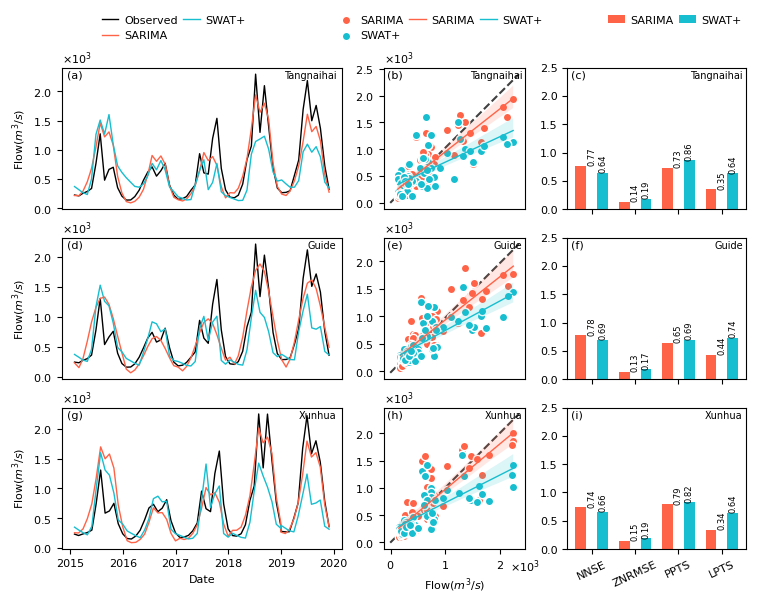

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from metrics import NNSE, ZNRMSE, PPTS, LPTS

hydro_stations = ['Tangnaihai', 'Guide', 'Xunhua']
val_years = np.arange(2009, 2015, 1)

plt.figure(figsize=(7.48,5.8))
ax1 = plt.subplot2grid((3,7), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,7), (0,3), colspan=2, aspect='equal')
ax3 = plt.subplot2grid((3,7), (0,5), colspan=2)
ax4 = plt.subplot2grid((3,7), (1,0), colspan=3)
ax5 = plt.subplot2grid((3,7), (1,3), colspan=2, aspect='equal')
ax6 = plt.subplot2grid((3,7), (1,5), colspan=2)
ax7 = plt.subplot2grid((3,7), (2,0), colspan=3)
ax8 = plt.subplot2grid((3,7), (2,3), colspan=2, aspect='equal')
ax9 = plt.subplot2grid((3,7), (2,5), colspan=2)

ax_list = [
    [ax1,ax2,ax3],
    [ax4,ax5,ax6],
    [ax7,ax8,ax9]
]
letters = [
    ['a', 'b', 'c'],
    ['d', 'e', 'f'],
    ['g', 'h', 'i']
]

metrics_results = pd.read_csv('../result/pred_metrics_result.csv',index_col=['station'])

line_width = 1
font_size = 8

for hydro_station,axs,letter in zip(hydro_stations,ax_list,letters):
    # 读取数据
    obs = pd.read_csv(f'../data/{hydro_station.lower()}_natural_monthly_flow.csv', 
                      index_col=['date'], parse_dates=['date'])
    
    obs_pred = obs['2015-01-01':'2019-12-31']
    

    add_arima_pred = pd.read_csv(f'../result/ARIMAPredData/seasonal_decompose_additive_arima_pred_{hydro_station.lower()}_2015_2019.csv',
                          parse_dates=['date'], index_col=['date'])
    
    mul_arima_pred = pd.read_csv(f'../result/ARIMAPredData/seasonal_decompose_multiplicative_arima_pred_{hydro_station.lower()}_2015_2019.csv',
                          parse_dates=['date'], index_col=['date'])
    
    swatplus_pred = pd.read_csv(f'../result/SWATPlusPredUsingSimYearData/{hydro_station}_SWATPlus_pred_obs_2015_2019.csv',
                          parse_dates=['date'], index_col=['date'])
    
    # pltmsf_pred = pd.read_csv(f'../result/PLTMSFPredData/PLTMSF_pred_{hydro_station.lower()}_2015_2019.csv',
    #                       parse_dates=['date'], index_col=['date'])
    

    df = pd.DataFrame(index=obs_pred.index)
    df['obs'] = obs_pred['flow(m^3/s)'].values
    df['add_arima'] = add_arima_pred['flow(m^3/s)'].values
    df['mul_arima'] = mul_arima_pred['flow(m^3/s)'].values
    df['swatplus'] = swatplus_pred['pred'].values

    

    sns.lineplot(data=df,x=df.index,y='obs',ax=axs[0],color='black',linewidth=line_width,label='Observed')
    # sns.lineplot(data=df,x=df.index,y='add_arima',ax=axs[0],color='tab:red',linewidth=line_width,label='Add ARIMA')
    sns.lineplot(data=df,x=df.index,y='mul_arima',ax=axs[0],color='tomato',linewidth=line_width,label='SARIMA')
    sns.lineplot(data=df,x=df.index,y='swatplus',ax=axs[0],color='tab:cyan',linewidth=line_width,label='SWAT+')
    

    # sns.scatterplot(data=df,x='obs',y='add_arima',ax=axs[1],color='tab:red',linewidth=line_width,label='Add ARIMA')
    sns.scatterplot(data=df,x='obs',y='mul_arima',ax=axs[1],color='tomato',linewidth=line_width,label='SARIMA')
    sns.scatterplot(data=df,x='obs',y='swatplus',ax=axs[1],color='tab:cyan',linewidth=line_width,label='SWAT+')
    

    # 添加45度斜线
    lims = [
        np.min([axs[1].get_xlim(), axs[1].get_ylim()]),  # 获取x和y轴的最小值
        np.max([axs[1].get_xlim(), axs[1].get_ylim()]),  # 获取x和y轴的最大值
    ]
    axs[1].plot(lims, lims, 'k--', alpha=0.75, zorder=0)

    # 添加实测预测散点图线型插值线，分别为校准期和验证期
    # sns.regplot(data=df, x='obs', y='add_arima', ax=axs[1], scatter=False, color='tab:red', line_kws={'linewidth': 1}, label='Add ARIMA')
    sns.regplot(data=df, x='obs', y='mul_arima', ax=axs[1], scatter=False, color='tomato', line_kws={'linewidth': 1}, label='SARIMA')
    sns.regplot(data=df, x='obs', y='swatplus', ax=axs[1], scatter=False, color='tab:cyan', line_kws={'linewidth': 1}, label='SWAT+')
   
    
    # 在axs[2]中绘制评价指标柱状图
    metrics = ['NNSE', 'ZNRMSE', 'PPTS', 'LPTS']
    x = np.arange(len(metrics))
    width = 0.25

    print()
    
    add_arima_values = [metrics_results.loc[f'{hydro_station}','NNSE_ARIMA_Additive'], 
                        metrics_results.loc[f'{hydro_station}','ZNRMSE_ARIMA_Additive'],
                        metrics_results.loc[f'{hydro_station}','PPTS_ARIMA_Additive'], 
                        metrics_results.loc[f'{hydro_station}','LPTS_ARIMA_Additive']]
    
    mul_arima_values = [metrics_results.loc[f'{hydro_station}','NNSE_ARIMA_Multiplicative'], 
                        metrics_results.loc[f'{hydro_station}','ZNRMSE_ARIMA_Multiplicative'],
                        metrics_results.loc[f'{hydro_station}','PPTS_ARIMA_Multiplicative'], 
                        metrics_results.loc[f'{hydro_station}','LPTS_ARIMA_Multiplicative']]
    
    swatplus_values = [metrics_results.loc[f'{hydro_station}','NNSE_SWATPlus'], 
                       metrics_results.loc[f'{hydro_station}','ZNRMSE_SWATPlus'],
                       metrics_results.loc[f'{hydro_station}','PPTS_SWATPlus'], 
                       metrics_results.loc[f'{hydro_station}','LPTS_SWATPlus']]
    
    # axs[2].bar(x - width, add_arima_values, width, label='Add ARIMA', color='tab:red')
    axs[2].bar(x - width, mul_arima_values, width, label='SARIMA', color='tomato')
    axs[2].bar(x + width, swatplus_values, width, label='SWAT+', color='tab:cyan')

    # 在柱状图上方显示数值
    # for i, v in enumerate(add_arima_values):
    #     axs[2].text(x[i] - width, v, f'{v:.2f}', ha='center', va='bottom', fontsize=font_size-2, rotation=90)
    for i, v in enumerate(mul_arima_values):
        axs[2].text(x[i], v, f'{v:.2f}', ha='center', va='bottom', fontsize=font_size-2, rotation=90)
    for i, v in enumerate(swatplus_values):
        axs[2].text(x[i] + width, v, f'{v:.2f}', ha='center', va='bottom', fontsize=font_size-2, rotation=90)

    axs[2].set_xticks(x)
    axs[2].set_xticklabels(metrics)
    axs[2].legend(fontsize=font_size-2)
    axs[2].tick_params(axis='both', which='major', labelsize=font_size-2)

    axs[2].set_xticks(x)
    axs[2].set_xticklabels(metrics, fontsize=font_size-1, rotation=35)
    axs[2].tick_params(axis='y', labelsize=font_size)
    axs[2].set_ylim(0, 2.5)
    
    axs[0].set_xlabel('Date', fontsize=font_size)
    axs[0].set_ylabel('Flow($m^3/s$)', fontsize=font_size)
    axs[0].tick_params(axis='x', rotation=0)  # 设置ax[0]的横轴标签rotation为25°
    
    # 根据测站情况设置axs[1]的标签
    if hydro_station in ['Tangnaihai', 'Guide']:
        axs[1].set_xlabel('')
    else:
        axs[1].set_xlabel('Flow($m^3/s$)', fontsize=font_size)

    axs[1].set_ylabel('')  # 所有测站的axs[1]都不显示纵轴标签

    if hydro_station == 'Tangnaihai':
        axs[0].legend(loc='upper center', bbox_to_anchor=(0.4, 1.45), ncol=2, fontsize=font_size,frameon=False,
                      columnspacing=0.5,
           handlelength=1.5,
           handletextpad=0.5,
           borderaxespad=0.5,
           borderpad=0.5,
           labelspacing=0.5,)
        axs[1].legend(loc='upper center', bbox_to_anchor=(0.4, 1.45), ncol=3, fontsize=font_size,frameon=False,
                      columnspacing=0.5,
           handlelength=1.5,
           handletextpad=0.5,
           borderaxespad=0.5,
           borderpad=0.5,
           labelspacing=0.5,)
        axs[2].legend(loc='upper center', bbox_to_anchor=(0.6, 1.45), ncol=2, fontsize=font_size, frameon=False,
                      columnspacing=0.5,
                      handlelength=1.5,
                      handletextpad=0.5,
                      borderaxespad=0.5,
                      borderpad=0.5,
                      labelspacing=0.5)
    else:
        axs[0].get_legend().remove()
        axs[1].get_legend().remove()
        axs[2].get_legend().remove()
        

        
    # 在每个子图中添加测站名称和编号
    
    for i, ax in enumerate(axs):
        ax.text(0.02, 0.98, f'({letter[i]})', transform=ax.transAxes, fontsize=font_size, va='top', ha='left')
        ax.text(0.98, 0.98, hydro_station, transform=ax.transAxes, fontsize=font_size-1, va='top', ha='right')

    
    # 设置axs[0]的纵轴使用科学计数法
    axs[0].yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    axs[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axs[0].yaxis.offsetText.set_fontsize(font_size)
    axs[0].tick_params(axis='both', which='major', labelsize=font_size)

    # 设置axs[1]的横轴和纵轴都使用科学计数法，并将标识紧贴轴末端边缘
    axs[1].yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    axs[1].xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    axs[1].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    axs[1].yaxis.offsetText.set_fontsize(font_size)
    axs[1].xaxis.offsetText.set_fontsize(font_size)
    axs[1].tick_params(axis='both', which='major', labelsize=font_size)
    
    # 尝试使用其他方法调整科学计数法标识的位置
    axs[1].yaxis.offsetText.set_position((0.0, 1))
    axs[1].xaxis.offsetText.set_position((1.1, 1.5))
    axs[1].xaxis.offsetText.set_va('bottom')  # 设置垂直对齐方式为底部
    axs[1].xaxis.offsetText.set_ha('right')   # 设置水平对齐方式为右侧

    if hydro_station in ['Tangnaihai', 'Guide']:
        axs[0].xaxis.set_ticklabels([])
        axs[0].xaxis.set_ticks([])
        axs[0].set_xlabel('')

    # 根据测站情况设置axs[1]的标签
    if hydro_station in ['Tangnaihai', 'Guide']:
        axs[1].set_xlabel('')
        axs[1].xaxis.set_ticks([])
        axs[1].set_xticklabels([])  # 不显示xticklabel
    else:
        axs[1].set_xlabel('Flow($m^3/s$)', fontsize=font_size)

    if hydro_station not in ['Tangnaihai', 'Guide']:
        axs[2].set_xticklabels(metrics, fontsize=font_size, rotation=25)
    else:
        axs[2].set_xticklabels([])
    
    
    
    
    # 调整子图之间的间距和边距
plt.subplots_adjust(left=0.065, right=0.98, top=0.90, bottom=0.07, wspace=0.3, hspace=0.2)
plt.savefig(f'../figs/PredWithoutErrorCorrection.png',format='png',dpi=300)
plt.savefig(f'../figs/PredWithoutErrorCorrection.eps',format='eps',dpi=1000)
plt.savefig(f'../figs/PredWithoutErrorCorrection.tif', format='TIFF', dpi=330)

Plot error of ARIMA models

使用matplotlib绘制各个测站add_arima和mul_arima两个模型的error的boxplot，不要改变原始读取数据计算error的部分，使用英文进行相关标注

C:\Users\ZJY\AppData\Local\Temp\ipykernel_103908\291959022.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, i].set_xticklabels(axes[0, i].get_xticklabels(), rotation=45, ha='right')
C:\Users\ZJY\AppData\Local\Temp\ipykernel_103908\291959022.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, i].set_xticklabels(axes[0, i].get_xticklabels(), rotation=45, ha='right')
C:\Users\ZJY\AppData\Local\Temp\ipykernel_103908\291959022.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, i].set_xticklabels(axes[0, i].get_xticklabels(), rotation=45, ha='right')


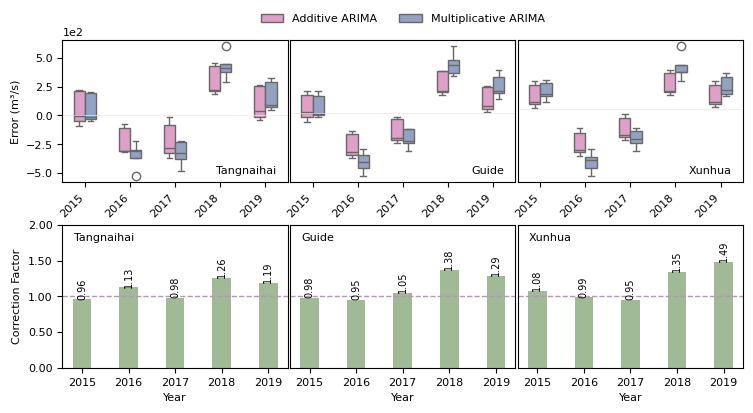

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hydro_stations = ['Tangnaihai','Guide','Xunhua']
years = np.arange(2015,2020,1)

error = {}
ratio_data = {}  # New dictionary to store ratio data

select = {
    'Tangnaihai_2015':'add',
    'Tangnaihai_2016':'add',
    'Tangnaihai_2017':'add',
    'Tangnaihai_2018':'add',
    'Tangnaihai_2019':'add',
    'Guide_2015':'add',
    'Guide_2016':'add',
    'Guide_2017':'add',
    'Guide_2018':'add',
    'Guide_2019':'add',
    'Xunhua_2015':'add',
    'Xunhua_2016':'add',
    'Xunhua_2017':'add',
    'Xunhua_2018':'add',
    'Xunhua_2019':'add',
}

for hydro_station in hydro_stations:
    add_arima = pd.read_csv(f'../result/ARIMAPredData/seasonal_decompose_additive_arima_pred_{hydro_station.lower()}_2015_2019.csv',
                          parse_dates=['date'], index_col=['date'])
    mul_arima = pd.read_csv(f'../result/ARIMAPredData/seasonal_decompose_multiplicative_arima_pred_{hydro_station.lower()}_2015_2019.csv',
                          parse_dates=['date'], index_col=['date'])
    
    swatplus = pd.read_csv(f'../result/SWATPlusPredUsingSimYearData/{hydro_station}_SWATPlus_pred_obs_2015_2019.csv',
                           parse_dates=['date'], index_col=['date'])
    
    obs = pd.read_csv(f'../data/{hydro_station.lower()}_natural_monthly_flow.csv',
                      index_col=['date'], parse_dates=['date'])
    
    obs = obs[:'2014-12-31']
    
    monthly_averages = obs.groupby(obs.index.month)['flow(m^3/s)'].mean()
    
    month_names = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 
                   'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    monthly_averages.index = month_names

    average = monthly_averages.mean()

    add_arima_diff = {}
    mul_arima_diff = {}
    ratio_data[hydro_station] = {}
    
    for year in range(2015, 2020):
        add_arima_year = add_arima[add_arima.index.year == year]
        mul_arima_year = mul_arima[mul_arima.index.year == year]
        swatplus_year = swatplus[swatplus.index.year == year]
        
        # 只计算5月到11月的error
        add_arima_diff[year] = add_arima_year.loc[add_arima_year.index.month.isin(range(6, 11)), 'flow(m^3/s)'].values - monthly_averages.iloc[5:10].values
        mul_arima_diff[year] = mul_arima_year.loc[mul_arima_year.index.month.isin(range(6, 11)), 'flow(m^3/s)'].values - monthly_averages.iloc[5:10].values

        # Calculate total flow from May to November for add_arima and swatplus
        add_arima_total = add_arima_year.loc[add_arima_year.index.month.isin(range(6, 11)), 'flow(m^3/s)'].sum()
        swatplus_total = swatplus_year.loc[swatplus_year.index.month.isin(range(6, 11)), 'pred'].sum()
        
        # Calculate and store the ratio
        ratio_data[hydro_station][year] = add_arima_total / swatplus_total

    error[hydro_station] = {'add_arima': add_arima_diff, 'mul_arima': mul_arima_diff}

fig, axes = plt.subplots(2, 3, figsize=(7.48, 4))
font_size = 8
line_width = 1
for i, station in enumerate(hydro_stations):
    data = []
    labels = []
    years = []
    for year in range(2015, 2020):
        data.extend(error[station]['add_arima'][year])
        data.extend(error[station]['mul_arima'][year])
        labels.extend(['Additive ARIMA'] * len(error[station]['add_arima'][year]))
        labels.extend(['Multiplicative ARIMA'] * len(error[station]['mul_arima'][year]))
        years.extend([str(year)] * (len(error[station]['add_arima'][year]) + len(error[station]['mul_arima'][year])))
    
    df = pd.DataFrame({'Error': data, 'Model': labels, 'Year': years})
    
    sns.boxplot(x='Year', y='Error', hue='Model', data=df, ax=axes[0, i], palette=['#E995C9', '#8C9FCA'], linewidth=line_width, dodge=True, width=0.5)
    axes[0, i].axhline(y=0, color='#FBDFE2', linestyle='-', linewidth=line_width-0.5)

    axes[0, i].tick_params(axis='both', which='major', labelsize=font_size)
    axes[0, i].set_xticklabels(axes[0, i].get_xticklabels(), rotation=45, ha='right')
    
    # Use scientific notation for y-axis
    # 使用科学计数法格式化y轴标签
    # scilimits=(0,0)表示始终使用科学计数法，不考虑数值大小
    # 第一个0表示指数的下限，第二个0表示指数的上限
    # 当指数在这个范围内时，不使用科学计数法；范围外则使用
    # 设置为(0,0)意味着总是使用科学计数法
    axes[0, i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axes[0, i].yaxis.offsetText.set_fontsize(font_size)
    
    if station == 'Guide':
        axes[0, i].legend(fontsize=font_size, ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1.25),frameon=False)
    else:
        axes[0, i].get_legend().remove()
    
    if station in ['Guide', 'Xunhua']:
        axes[0, i].set_ylabel('')
        axes[0, i].set_yticklabels([])
        axes[0, i].tick_params(axis='y', which='both', left=False)
    else:
        axes[0, i].set_ylabel('Error (m³/s)', fontsize=font_size)
    
    # Add station name as text in the lower right corner
    axes[0, i].text(0.95, 0.05, station, transform=axes[0, i].transAxes, 
                    fontsize=font_size, ha='right', va='bottom')
    
    # Remove x-label for the first row
    axes[0, i].set_xlabel('')
    # axes[0, i].set_ylim(-750,750)
    
    # Plot ratio data as bar chart
    years = list(ratio_data[station].keys())
    ratios = list(ratio_data[station].values())
    bars = axes[1, i].bar(years, ratios, color='#9FBA95', width=0.4)
    axes[1, i].set_xlabel('Year', fontsize=font_size)
    if station not in ['Guide', 'Xunhua']:
        axes[1, i].set_ylabel('Correction Factor', fontsize=font_size)
        # Set y-axis tick labels to 1 decimal place
        axes[1, i].yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
    else:
        axes[1, i].set_ylabel('')
        axes[1, i].set_yticklabels([])
        axes[1, i].tick_params(axis='y', which='both', left=False)
    axes[1, i].tick_params(axis='both', which='major', labelsize=font_size)
    axes[1, i].set_ylim(0, max(max(ratios) for station_data in ratio_data.values()) * 1.1)
    
    # Add horizontal line at y=1
    axes[1, i].axhline(y=1, color='#B696B6', linestyle='--', linewidth=line_width)
    
    # Add station name as text in the upper left corner
    axes[1, i].text(0.05, 0.95, station, transform=axes[1, i].transAxes, 
                    fontsize=font_size, ha='left', va='top')
    
    
    # Add vertical text labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        axes[1, i].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.2f}',
                        ha='center', va='bottom', rotation=90, fontsize=font_size-1)
        
    axes[1, i].set_ylim(0,2)
    
    

plt.subplots_adjust(left=0.08, right=0.99, top=0.92, bottom=0.1, wspace=0.01, hspace=0.3)
plt.savefig(f'../figs/Monthly_Average_and_ARIMA_Error_with_Ratio.png',format='png',dpi=300)
plt.savefig(f'../figs/Monthly_Average_and_ARIMA_Error_with_Ratio.eps',format='eps',dpi=1000)
plt.savefig(f'../figs/Monthly_Average_and_ARIMA_Error_with_Ratio.tif', format='TIFF', dpi=330)
plt.show()


Plot error of ARIMA models and correction factor of SWATPlus


C:\Users\ZJY\AppData\Local\Temp\ipykernel_103908\2729387335.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Error', data=df, ax=axes[0, i], palette=['#E995C9', '#8C9FCA'], linewidth=line_width, dodge=True, width=0.5)
C:\Users\ZJY\AppData\Local\Temp\ipykernel_103908\2729387335.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, i].set_xticklabels(axes[0, i].get_xticklabels(), rotation=45, ha='right')
C:\Users\ZJY\AppData\Local\Temp\ipykernel_103908\2729387335.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Error', data=df, ax=axes[0, i], palette=['#E995C9', '#8C

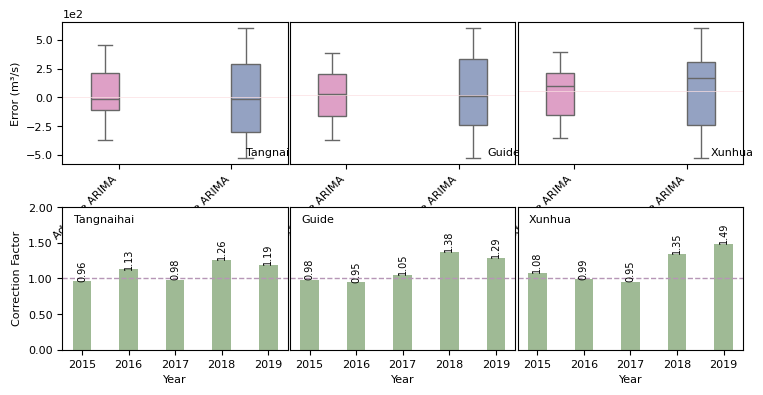

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hydro_stations = ['Tangnaihai','Guide','Xunhua']
years = np.arange(2015,2020,1)

error = {}
ratio_data = {}  # New dictionary to store ratio data

select = {
    'Tangnaihai_2015':'add',
    'Tangnaihai_2016':'add',
    'Tangnaihai_2017':'add',
    'Tangnaihai_2018':'add',
    'Tangnaihai_2019':'add',
    'Guide_2015':'add',
    'Guide_2016':'add',
    'Guide_2017':'add',
    'Guide_2018':'add',
    'Guide_2019':'add',
    'Xunhua_2015':'add',
    'Xunhua_2016':'add',
    'Xunhua_2017':'add',
    'Xunhua_2018':'add',
    'Xunhua_2019':'add',
}

for hydro_station in hydro_stations:
    add_arima = pd.read_csv(f'../result/ARIMAPredData/seasonal_decompose_additive_arima_pred_{hydro_station.lower()}_2015_2019.csv',
                          parse_dates=['date'], index_col=['date'])
    mul_arima = pd.read_csv(f'../result/ARIMAPredData/seasonal_decompose_multiplicative_arima_pred_{hydro_station.lower()}_2015_2019.csv',
                          parse_dates=['date'], index_col=['date'])
    
    swatplus = pd.read_csv(f'../result/SWATPlusPredUsingSimYearData/{hydro_station}_SWATPlus_pred_obs_2015_2019.csv',
                           parse_dates=['date'], index_col=['date'])
    
    obs = pd.read_csv(f'../data/{hydro_station.lower()}_natural_monthly_flow.csv',
                      index_col=['date'], parse_dates=['date'])
    
    obs = obs[:'2014-12-31']
    
    monthly_averages = obs.groupby(obs.index.month)['flow(m^3/s)'].mean()
    
    month_names = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 
                   'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    monthly_averages.index = month_names

    average = monthly_averages.mean()

    add_arima_diff = []
    mul_arima_diff = []
    ratio_data[hydro_station] = {}
    
    for year in range(2015, 2020):
        add_arima_year = add_arima[add_arima.index.year == year]
        mul_arima_year = mul_arima[mul_arima.index.year == year]
        swatplus_year = swatplus[swatplus.index.year == year]
        
        # Calculate error for May to November
        add_arima_diff.extend(add_arima_year.loc[add_arima_year.index.month.isin(range(6, 11)), 'flow(m^3/s)'].values - monthly_averages.iloc[5:10].values)
        mul_arima_diff.extend(mul_arima_year.loc[mul_arima_year.index.month.isin(range(6, 11)), 'flow(m^3/s)'].values - monthly_averages.iloc[5:10].values)

        # Calculate total flow from May to November for add_arima and swatplus
        add_arima_total = add_arima_year.loc[add_arima_year.index.month.isin(range(6, 11)), 'flow(m^3/s)'].sum()
        swatplus_total = swatplus_year.loc[swatplus_year.index.month.isin(range(6, 11)), 'pred'].sum()
        
        # Calculate and store the ratio
        ratio_data[hydro_station][year] = add_arima_total / swatplus_total

    error[hydro_station] = {'add_arima': add_arima_diff, 'mul_arima': mul_arima_diff}

fig, axes = plt.subplots(2, 3, figsize=(7.48, 4))
font_size = 8
line_width = 1
for i, station in enumerate(hydro_stations):
    df = pd.DataFrame({
        'Error': error[station]['add_arima'] + error[station]['mul_arima'],
        'Model': ['Additive ARIMA'] * len(error[station]['add_arima']) + ['Multiplicative ARIMA'] * len(error[station]['mul_arima'])
    })
    
    sns.boxplot(x='Model', y='Error', data=df, ax=axes[0, i], palette=['#E995C9', '#8C9FCA'], linewidth=line_width, dodge=True, width=0.5)
    axes[0, i].axhline(y=0, color='#FBDFE2', linestyle='-', linewidth=line_width-0.5)

    axes[0, i].tick_params(axis='both', which='major', labelsize=font_size)
    axes[0, i].set_xticklabels(axes[0, i].get_xticklabels(), rotation=45, ha='right')
    
    axes[0, i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axes[0, i].yaxis.offsetText.set_fontsize(font_size)
    
    # if station == 'Guide':
        # axes[0, i].legend(fontsize=font_size, ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1.25), frameon=False)
    # else:
        # axes[0, i].get_legend().remove()
    
    if station in ['Guide', 'Xunhua']:
        axes[0, i].set_ylabel('')
        axes[0, i].set_yticklabels([])
        axes[0, i].tick_params(axis='y', which='both', left=False)
    else:
        axes[0, i].set_ylabel('Error (m³/s)', fontsize=font_size)
    
    axes[0, i].text(0.95, 0.05, station, transform=axes[0, i].transAxes, 
                    fontsize=font_size, ha='center', va='bottom')
    
    axes[0, i].set_xlabel('')
    # axes[0, i].set_ylim(-750,750)
    
    # Plot ratio data as bar chart
    years = list(ratio_data[station].keys())
    ratios = list(ratio_data[station].values())
    bars = axes[1, i].bar(years, ratios, color='#9FBA95', width=0.4)
    axes[1, i].set_xlabel('Year', fontsize=font_size)
    if station not in ['Guide', 'Xunhua']:
        axes[1, i].set_ylabel('Correction Factor', fontsize=font_size)
        axes[1, i].yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
    else:
        axes[1, i].set_ylabel('')
        axes[1, i].set_yticklabels([])
        axes[1, i].tick_params(axis='y', which='both', left=False)
    axes[1, i].tick_params(axis='both', which='major', labelsize=font_size)
    axes[1, i].set_ylim(0, max(max(ratios) for station_data in ratio_data.values()) * 1.1)
    
    axes[1, i].axhline(y=1, color='#B696B6', linestyle='--', linewidth=line_width)
    
    axes[1, i].text(0.05, 0.95, station, transform=axes[1, i].transAxes, 
                    fontsize=font_size, ha='left', va='top')
    
    for bar in bars:
        height = bar.get_height()
        axes[1, i].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.2f}',
                        ha='center', va='bottom', rotation=90, fontsize=font_size-1)
        
    axes[1, i].set_ylim(0,2)

plt.subplots_adjust(left=0.08, right=0.99, top=0.92, bottom=0.1, wspace=0.01, hspace=0.3)
plt.savefig(f'../figs/Monthly_Average_and_ARIMA_Error_with_Ratio.png',format='png',dpi=300)
plt.savefig(f'../figs/Monthly_Average_and_ARIMA_Error_with_Ratio.eps',format='eps',dpi=1000)
plt.savefig(f'../figs/Monthly_Average_and_ARIMA_Error_with_Ratio.tif', format='TIFF', dpi=330)
plt.show()

Plot forecast results of PLTMSF and SWATPlus

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


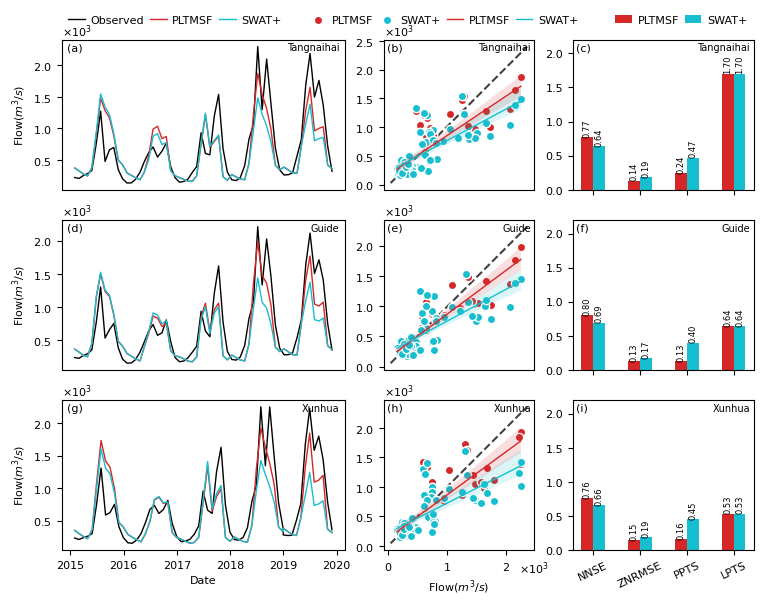

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from metrics import NNSE, ZNRMSE, PPTS, LPTS

hydro_stations = ['Tangnaihai', 'Guide', 'Xunhua']
val_years = np.arange(2009, 2015, 1)

plt.figure(figsize=(7.48,5.8))
ax1 = plt.subplot2grid((3,7), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,7), (0,3), colspan=2, aspect='equal')
ax3 = plt.subplot2grid((3,7), (0,5), colspan=2)
ax4 = plt.subplot2grid((3,7), (1,0), colspan=3)
ax5 = plt.subplot2grid((3,7), (1,3), colspan=2, aspect='equal')
ax6 = plt.subplot2grid((3,7), (1,5), colspan=2)
ax7 = plt.subplot2grid((3,7), (2,0), colspan=3)
ax8 = plt.subplot2grid((3,7), (2,3), colspan=2, aspect='equal')
ax9 = plt.subplot2grid((3,7), (2,5), colspan=2)

ax_list = [
    [ax1,ax2,ax3],
    [ax4,ax5,ax6],
    [ax7,ax8,ax9]
]
letters = [
    ['a', 'b', 'c'],
    ['d', 'e', 'f'],
    ['g', 'h', 'i']
]

metrics_results = pd.read_csv('../result/pred_metrics_result.csv',index_col=['station'])

line_width = 1
font_size = 8

for hydro_station,axs,letter in zip(hydro_stations,ax_list,letters):
    # 读取数据
    obs = pd.read_csv(f'../data/{hydro_station.lower()}_natural_monthly_flow.csv', 
                      index_col=['date'], parse_dates=['date'])
    
    obs_pred = obs['2015-01-01':'2019-12-31']
    
    swatplus_pred = pd.read_csv(f'../result/SWATPlusPredUsingSimYearData/{hydro_station}_SWATPlus_pred_obs_2015_2019.csv',
                          parse_dates=['date'], index_col=['date'])
    
    pltmsf_pred = pd.read_csv(f'../result/SWATPlusPredUsingSimYearData/{hydro_station}_SWATPlus_corrected_pred_obs_2015_2019.csv',
                          parse_dates=['date'], index_col=['date'])
    

    df = pd.DataFrame(index=obs_pred.index)
    df['obs'] = obs_pred['flow(m^3/s)'].values
    df['swatplus'] = swatplus_pred['pred'].values
    df['pltmsf'] = pltmsf_pred['pred'].values

    

    sns.lineplot(data=df,x=df.index,y='obs',ax=axs[0],color='black',linewidth=line_width,label='Observed')
    sns.lineplot(data=df,x=df.index,y='pltmsf',ax=axs[0],color='tab:red',linewidth=line_width,label='PLTMSF')
    sns.lineplot(data=df,x=df.index,y='swatplus',ax=axs[0],color='tab:cyan',linewidth=line_width,label='SWAT+')
    

    sns.scatterplot(data=df,x='obs',y='pltmsf',ax=axs[1],color='tab:red',linewidth=line_width,label='PLTMSF')
    sns.scatterplot(data=df,x='obs',y='swatplus',ax=axs[1],color='tab:cyan',linewidth=line_width,label='SWAT+')
    

    # 添加45度斜线
    lims = [
        np.min([axs[1].get_xlim(), axs[1].get_ylim()]),  # 获取x和y轴的最小值
        np.max([axs[1].get_xlim(), axs[1].get_ylim()]),  # 获取x和y轴的最大值
    ]
    axs[1].plot(lims, lims, 'k--', alpha=0.75, zorder=0)

    # 添加实测预测散点图线型插值线，分别为校准期和验证期
    sns.regplot(data=df, x='obs', y='pltmsf', ax=axs[1], scatter=False, color='tab:red', line_kws={'linewidth': 1}, label='PLTMSF')
    sns.regplot(data=df, x='obs', y='swatplus', ax=axs[1], scatter=False, color='tab:cyan', line_kws={'linewidth': 1}, label='SWAT+')
   
    
    # 在axs[2]中绘制评价指标柱状图
    metrics = ['NNSE', 'ZNRMSE', 'PPTS', 'LPTS']
    x = np.arange(len(metrics))
    width = 0.25

    print()
    
    pltmsf_values = [metrics_results.loc[f'{hydro_station}','NNSE_PLTMSF'], 
                        metrics_results.loc[f'{hydro_station}','ZNRMSE_PLTMSF'],
                        metrics_results.loc[f'{hydro_station}','PPTS_PLTMSF'], 
                        metrics_results.loc[f'{hydro_station}','LPTS_PLTMSF']]
    
    swatplus_values = [metrics_results.loc[f'{hydro_station}','NNSE_SWATPlus'], 
                        metrics_results.loc[f'{hydro_station}','ZNRMSE_SWATPlus'],
                        metrics_results.loc[f'{hydro_station}','PPTS_SWATPlus'], 
                        metrics_results.loc[f'{hydro_station}','LPTS_SWATPlus']]

    
    axs[2].bar(x - width/2, pltmsf_values, width, label='PLTMSF', color='tab:red')
    axs[2].bar(x + width/2, swatplus_values, width, label='SWAT+', color='tab:cyan')

    # 在柱状图上方显示数值
    for i, v in enumerate(pltmsf_values):
        axs[2].text(x[i] - width/2, v, f'{v:.2f}', ha='center', va='bottom', fontsize=font_size-2, rotation=90)
    for i, v in enumerate(swatplus_values):
        axs[2].text(x[i] + width/2, v, f'{v:.2f}', ha='center', va='bottom', fontsize=font_size-2, rotation=90)

    axs[2].set_xticks(x)
    
    axs[2].legend(fontsize=font_size-2)
    axs[2].tick_params(axis='both', which='major', labelsize=font_size)
    axs[2].set_ylim(0, 2.2)
    
    axs[0].set_xlabel('Date', fontsize=font_size)
    axs[0].set_ylabel('Flow($m^3/s$)', fontsize=font_size)
    axs[0].tick_params(axis='x', rotation=0)  # 设置ax[0]的横轴标签rotation为25°
    
    

    axs[1].set_ylabel('')  # 所有测站的axs[1]都不显示纵轴标签

    if hydro_station == 'Tangnaihai':
        axs[0].legend(loc='upper center', bbox_to_anchor=(0.4, 1.24), ncol=3, fontsize=font_size,frameon=False,
                      columnspacing=0.5,
           handlelength=1.5,
           handletextpad=0.5,
           borderaxespad=0.5,
           borderpad=0.5,
           labelspacing=0.5,)
        axs[1].legend(loc='upper center', bbox_to_anchor=(0.4, 1.24), ncol=4, fontsize=font_size,frameon=False,
                      columnspacing=0.5,
           handlelength=1.5,
           handletextpad=0.5,
           borderaxespad=0.5,
           borderpad=0.5,
           labelspacing=0.5,)
        axs[2].legend(loc='upper center', bbox_to_anchor=(0.6, 1.24), ncol=3, fontsize=font_size, frameon=False,
                      columnspacing=0.5,
                      handlelength=1.5,
                      handletextpad=0.5,
                      borderaxespad=0.5,
                      borderpad=0.5,
                      labelspacing=0.5)
    else:
        axs[0].get_legend().remove()
        axs[1].get_legend().remove()
        axs[2].get_legend().remove()
        

        
    # 在每个子图中添加测站名称和编号
    
    for i, ax in enumerate(axs):
        ax.text(0.02, 0.98, f'({letter[i]})', transform=ax.transAxes, fontsize=font_size, va='top', ha='left')
        ax.text(0.98, 0.98, hydro_station, transform=ax.transAxes, fontsize=font_size-1, va='top', ha='right')

    

    # 设置axs[0]的纵轴使用科学计数法
    axs[0].yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    axs[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axs[0].yaxis.offsetText.set_fontsize(font_size)
    axs[0].tick_params(axis='both', which='major', labelsize=font_size)

    # 设置axs[1]的横轴和纵轴都使用科学计数法，并将标识紧贴轴末端边缘
    axs[1].yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    axs[1].xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    axs[1].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    axs[1].yaxis.offsetText.set_fontsize(font_size)
    axs[1].xaxis.offsetText.set_fontsize(font_size)
    axs[1].tick_params(axis='both', which='major', labelsize=font_size)
    
    # 尝试使用其他方法调整科学计数法标识的位置
    axs[1].yaxis.offsetText.set_position((0.0, 1))
    axs[1].xaxis.offsetText.set_position((1.1, 1.5))
    axs[1].xaxis.offsetText.set_va('bottom')  # 设置垂直对齐方式为底部
    axs[1].xaxis.offsetText.set_ha('right')   # 设置水平对齐方式为右侧

    if hydro_station in ['Tangnaihai', 'Guide']:
        axs[0].xaxis.set_ticklabels([])
        axs[0].xaxis.set_ticks([])
        axs[0].set_xlabel('')

    # 根据测站情况设置axs[1]的标签
    if hydro_station in ['Tangnaihai', 'Guide']:
        axs[1].set_xlabel('')
        axs[1].xaxis.set_ticks([])
        axs[1].set_xticklabels([])  # 不显示xticklabel
    else:
        axs[1].set_xlabel('Flow($m^3/s$)', fontsize=font_size)

    if hydro_station not in ['Tangnaihai', 'Guide']:
        axs[2].set_xticklabels(metrics, fontsize=font_size, rotation=25)
    else:
        axs[2].set_xticklabels([])
    
    
    
    # 调整子图之间的间距和边距
plt.subplots_adjust(left=0.065, right=0.99, top=0.95, bottom=0.07, wspace=0.3, hspace=0.2)
plt.savefig(f'../figs/PredWithErrorCorrection.png',format='png',dpi=300)
plt.savefig(f'../figs/PredWithErrorCorrection.eps',format='eps',dpi=1000)
plt.savefig(f'../figs/PredWithErrorCorrection.tif', format='TIFF', dpi=330)